### Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statistics import mean
from pandas.io import gbq
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

pd.options.mode.chained_assignment = None  # default='warn'

### Benchmark - Pharmacokinetic Model 2

In [4]:
# Load Data
query = """
        SELECT *
        FROM `bachelorarbeit-heparin.mimic_data.cohort1_final`
        """
df = gbq.read_gbq(query, project_id = "bachelorarbeit-heparin")

# Define x & y:
x = pd.DataFrame({'kum_hep_t': df['kum_hep_t']})                 
y = pd.DataFrame({'PTT': df['PTT']})

# Linear Regression & MLP Regressor
r2_scores_lin_reg = []
r2_scores_MLP = []

for i in range(100):
    
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=i)
    lin_reg = LinearRegression().fit(x_train, y_train)
    r2_scores_lin_reg.append(r2_score(y_test, lin_reg.predict(x_test)))
    
    regr = MLPRegressor(random_state=i, max_iter=500).fit(x_train, y_train.values.ravel())
    r2_scores_MLP.append(regr.score(x_test, y_test))
    
# Polynomial Regression
max_r2_score = 0
degree = 0

# Determine Average Performance (n=100)
for i in range(2, 11, 1):
    
    r2_scores_poly_reg = []
    
    for j in range(100):
    
        x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=j)
        poly = PolynomialFeatures(degree=i)
        x_train_poly = poly.fit_transform(x_train)
        x_test_poly = poly.fit_transform(x_test)
        lin_reg = LinearRegression().fit(x_train_poly, y_train)
        r2_scores_poly_reg.append(r2_score(y_test, lin_reg.predict(x_test_poly)))
        
    if mean(r2_scores_poly_reg) > max_r2_score:
        max_r2_score = mean(r2_scores_poly_reg)
        degree = i

# Evaluate the Model
print("AVG (n=100) Lin.Reg. R2-Score: ", round(mean(r2_scores_lin_reg),4))
print("AVG (n=100) Poly.Reg. R2-Score: ",round(max_r2_score,4)," Degree:",degree)
print("AVG (n=100) MLP Regressor R2-Score: ", round(mean(r2_scores_MLP),4))

Downloading: 100%|███████████████████████████████████████████████████████████| 15376/15376 [00:04<00:00, 3423.24rows/s]


AVG (n=100) Lin.Reg. R2-Score:  0.1749
AVG (n=100) Poly.Reg. R2-Score:  0.185  Degree: 10
AVG (n=100) MLP Regressor R2-Score:  0.1745


### AGE

In [4]:
# Load Data
query = """
        SELECT *
        FROM `bachelorarbeit-heparin.mimic_data.cohort1_final`
        """
df = gbq.read_gbq(query, project_id = "bachelorarbeit-heparin")

# Define x & y:
x = pd.DataFrame({'kum_hep_t':      df['kum_hep_t'],
                  'age':            df['age']})              
y = pd.DataFrame({'PTT': df['PTT']})
                  
# Linear Regression & MLP Regressor
r2_scores_lin_reg = []
r2_scores_MLP = []

for i in range(100):
    
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=i)
    lin_reg = LinearRegression().fit(x_train, y_train)
    r2_scores_lin_reg.append(r2_score(y_test, lin_reg.predict(x_test)))
    
    regr = MLPRegressor(random_state=i, max_iter=500).fit(x_train, y_train.values.ravel())
    r2_scores_MLP.append(regr.score(x_test, y_test))
    
# Polynomial Regression
max_r2_score = 0
degree = 0

# Determine Average Performance (n=100)
for i in range(2, 11, 1):
    
    r2_scores_poly_reg = []
    
    for j in range(100):
    
        x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=j)
        poly = PolynomialFeatures(degree=i)
        x_train_poly = poly.fit_transform(x_train)
        x_test_poly = poly.fit_transform(x_test)
        lin_reg = LinearRegression().fit(x_train_poly, y_train)
        r2_scores_poly_reg.append(r2_score(y_test, lin_reg.predict(x_test_poly)))
        
    if mean(r2_scores_poly_reg) > max_r2_score:
        max_r2_score = mean(r2_scores_poly_reg)
        degree = i

# Evaluate the Model
print("AVG (n=100) Lin.Reg. R2-Score: ", round(mean(r2_scores_lin_reg),4))
print("AVG (n=100) Poly.Reg. R2-Score: ",round(max_r2_score,4)," Degree:",degree)
print("AVG (n=100) MLP Regressor R2-Score: ", round(mean(r2_scores_MLP),4))

Downloading: 100%|███████████████████████████████████████████████████████████| 15376/15376 [00:04<00:00, 3084.74rows/s]


AVG (n=100) Lin.Reg. R2-Score:  0.1877
AVG (n=100) Poly.Reg. R2-Score:  0.1984  Degree: 5
AVG (n=100) MLP Regressor R2-Score:  0.1865


### GENDER

In [5]:
# Load Data
query = """
        SELECT *
        FROM `bachelorarbeit-heparin.mimic_data.cohort1_final`
        """
df = gbq.read_gbq(query, project_id = "bachelorarbeit-heparin")


# Convert gender to binary variables:
for i in range(len(df['gender'])):
    
    if df['gender'][i] == 'M':
        df['gender'][i] = 0
    elif df['gender'][i] == 'F':
        df['gender'][i] = 1

# Define x & y:
x = pd.DataFrame({'kum_hep_t':      df['kum_hep_t'],
                  'gender':         df['gender']})              
y = pd.DataFrame({'PTT': df['PTT']})

# Linear Regression & MLP Regressor
r2_scores_lin_reg = []
r2_scores_MLP = []

for i in range(100):
    
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=i)
    lin_reg = LinearRegression().fit(x_train, y_train)
    r2_scores_lin_reg.append(r2_score(y_test, lin_reg.predict(x_test)))
    
    regr = MLPRegressor(random_state=i, max_iter=500).fit(x_train, y_train.values.ravel())
    r2_scores_MLP.append(regr.score(x_test, y_test))
    
# Polynomial Regression
max_r2_score = 0
degree = 0

# Determine Average Performance (n=100)
for i in range(2, 11, 1):
    
    r2_scores_poly_reg = []
    
    for j in range(100):
    
        x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=j)
        poly = PolynomialFeatures(degree=i)
        x_train_poly = poly.fit_transform(x_train)
        x_test_poly = poly.fit_transform(x_test)
        lin_reg = LinearRegression().fit(x_train_poly, y_train)
        r2_scores_poly_reg.append(r2_score(y_test, lin_reg.predict(x_test_poly)))
        
    if mean(r2_scores_poly_reg) > max_r2_score:
        max_r2_score = mean(r2_scores_poly_reg)
        degree = i

# Evaluate the Model
print("AVG (n=100) Lin.Reg. R2-Score: ", round(mean(r2_scores_lin_reg),4))
print("AVG (n=100) Poly.Reg. R2-Score: ",round(max_r2_score,4)," Degree:",degree)
print("AVG (n=100) MLP Regressor R2-Score: ", round(mean(r2_scores_MLP),4))

Downloading: 100%|███████████████████████████████████████████████████████████| 15376/15376 [00:05<00:00, 2922.67rows/s]


AVG (n=100) Lin.Reg. R2-Score:  0.1821
AVG (n=100) Poly.Reg. R2-Score:  0.1914  Degree: 5
AVG (n=100) MLP Regressor R2-Score:  0.1818


### RELATIVE CHARTTIME

In [6]:
# Load Data
query = """
        SELECT *
        FROM `bachelorarbeit-heparin.mimic_data.cohort1_final`
        """
df = gbq.read_gbq(query, project_id = "bachelorarbeit-heparin")

# Define x & y:
x = pd.DataFrame({'kum_hep_t':      df['kum_hep_t'],
                  'rel_charttime':  df['rel_charttime']})              
y = pd.DataFrame({'PTT': df['PTT']})
                  
# Linear Regression & MLP Regressor
r2_scores_lin_reg = []
r2_scores_MLP = []

for i in range(100):
    
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=i)
    lin_reg = LinearRegression().fit(x_train, y_train)
    r2_scores_lin_reg.append(r2_score(y_test, lin_reg.predict(x_test)))
    
    regr = MLPRegressor(random_state=i, max_iter=500).fit(x_train, y_train.values.ravel())
    r2_scores_MLP.append(regr.score(x_test, y_test))
    
# Polynomial Regression
max_r2_score = 0
degree = 0

for i in range(2,11, 1):
    
    r2_scores_poly_reg = []
    
    for j in range(100):
    
        x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=j)
        poly = PolynomialFeatures(degree=i)
        x_train_poly = poly.fit_transform(x_train)
        x_test_poly = poly.fit_transform(x_test)
        lin_reg = LinearRegression().fit(x_train_poly, y_train)
        r2_scores_poly_reg.append(r2_score(y_test, lin_reg.predict(x_test_poly)))
        
    if mean(r2_scores_poly_reg) > max_r2_score:
        max_r2_score = mean(r2_scores_poly_reg)
        degree = i

# Evaluate the Models
print("AVG (n=100) Lin.Reg. R2-Score: ", round(mean(r2_scores_lin_reg),4))
print("AVG (n=100) Poly.Reg. R2-Score: ",round(max_r2_score,4)," Degree:",degree)
print("AVG (n=100) MLP Regressor R2-Score: ", round(mean(r2_scores_MLP),4))

Downloading: 100%|███████████████████████████████████████████████████████████| 15376/15376 [00:05<00:00, 2602.94rows/s]


AVG (n=100) Lin.Reg. R2-Score:  0.181
AVG (n=100) Poly.Reg. R2-Score:  0.1983  Degree: 5
AVG (n=100) MLP Regressor R2-Score:  0.1711


### SOFA SCORE (GENERIC)

In [7]:
# Load Data
query = """
        SELECT *
        FROM `bachelorarbeit-heparin.mimic_data.cohort1_final`
        """
df = gbq.read_gbq(query, project_id = "bachelorarbeit-heparin")

# Define x & y:
x = pd.DataFrame({'kum_hep_t':      df['kum_hep_t'],
                  'sofa_score':     df['sofa_score']})               
y = pd.DataFrame({'PTT': df['PTT']})

# Linear Regression & MLP Regressor
r2_scores_lin_reg = []
r2_scores_MLP = []

for i in range(100):
    
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=i)
    lin_reg = LinearRegression().fit(x_train, y_train)
    r2_scores_lin_reg.append(r2_score(y_test, lin_reg.predict(x_test)))
    
    regr = MLPRegressor(random_state=i, max_iter=500).fit(x_train, y_train.values.ravel())
    r2_scores_MLP.append(regr.score(x_test, y_test))
    
# Polynomial Regression
max_r2_score = 0
degree = 0

for i in range(2, 11, 1):
    
    r2_scores_poly_reg = []
    
    for j in range(100):
    
        x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=j)
        poly = PolynomialFeatures(degree=i)
        x_train_poly = poly.fit_transform(x_train)
        x_test_poly = poly.fit_transform(x_test)
        lin_reg = LinearRegression().fit(x_train_poly, y_train)
        r2_scores_poly_reg.append(r2_score(y_test, lin_reg.predict(x_test_poly)))
        
    if mean(r2_scores_poly_reg) > max_r2_score:
        max_r2_score = mean(r2_scores_poly_reg)
        degree = i

# Evaluate the Models
print("AVG (n=100) Lin.Reg. R2-Score: ", round(mean(r2_scores_lin_reg),4))
print("AVG (n=100) Poly.Reg. R2-Score: ",round(max_r2_score,4)," Degree:",degree)
print("AVG (n=100) MLP Regressor R2-Score: ", round(mean(r2_scores_MLP),4))

Downloading: 100%|███████████████████████████████████████████████████████████| 15376/15376 [00:05<00:00, 2918.66rows/s]


AVG (n=100) Lin.Reg. R2-Score:  0.1979
AVG (n=100) Poly.Reg. R2-Score:  0.2065  Degree: 3
AVG (n=100) MLP Regressor R2-Score:  0.1977


### SOFA SCORE (SPECIFIC)

In [6]:
# Load Data
query = """
        SELECT *
        FROM `bachelorarbeit-heparin.mimic_data.cohort1_final`
        """
df = gbq.read_gbq(query, project_id = "bachelorarbeit-heparin")

# Define x & y:
x = pd.DataFrame({'kum_hep_t': df['kum_hep_t'],
                  'sofa_resp':      df['sofa_resp'],
                  'sofa_coag':      df['sofa_coag'],
                  'sofa_liver':     df['sofa_liver'],
                  'sofa_cardio':    df['sofa_cardio'],
                  'sofa_cns':       df['sofa_cns'],
                  'sofa_renal':     df['sofa_renal']})                 
y = pd.DataFrame({'PTT':            df['PTT']})
                  
# Linear Regression & MLP Regressor
r2_scores_lin_reg = []
r2_scores_MLP = []

for i in range(100):
    
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=i)
    lin_reg = LinearRegression().fit(x_train, y_train)
    r2_scores_lin_reg.append(r2_score(y_test, lin_reg.predict(x_test)))
    
    regr = MLPRegressor(random_state=i, max_iter=500).fit(x_train, y_train.values.ravel())
    r2_scores_MLP.append(regr.score(x_test, y_test))
    
# Polynomial Regression
max_r2_score = 0
degree = 0

for i in range(2, 6, 1):
    
    r2_scores_poly_reg = []
    
    for j in range(100):
    
        x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=j)
        poly = PolynomialFeatures(degree=i)
        x_train_poly = poly.fit_transform(x_train)
        x_test_poly = poly.fit_transform(x_test)
        lin_reg = LinearRegression().fit(x_train_poly, y_train)
        r2_scores_poly_reg.append(r2_score(y_test, lin_reg.predict(x_test_poly)))
        
    if mean(r2_scores_poly_reg) > max_r2_score:
        max_r2_score = mean(r2_scores_poly_reg)
        degree = i

# Evaluate the Models
print("AVG (n=100) Lin.Reg. R2-Score: ", round(mean(r2_scores_lin_reg),4))
print("AVG (n=100) Poly.Reg. R2-Score: ",round(max_r2_score,4)," Degree:",degree)
print("AVG (n=100) MLP Regressor R2-Score: ", round(mean(r2_scores_MLP),4))

Downloading: 100%|███████████████████████████████████████████████████████████| 15376/15376 [00:04<00:00, 3288.61rows/s]
C:\Users\mikad\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


AVG (n=100) Lin.Reg. R2-Score:  0.204
AVG (n=100) Poly.Reg. R2-Score:  0.2196  Degree: 3
AVG (n=100) MLP Regressor R2-Score:  0.2141


### ETHNICITY

In [3]:
# Load Data
query = """
        SELECT *
        FROM `bachelorarbeit-heparin.mimic_data.cohort1_final`
        """
df = gbq.read_gbq(query, project_id = "bachelorarbeit-heparin")

# New columns as features:
ethnicity_WHITE = []
ethnicity_BLACK_AFRICAN_AMERICAN = []
ethnicity_HISPANIC_LATINO = []
ethnicity_ASIAN = []
ethnicity_MISC = []

# Convert ethnicities:
for i in range(len(df['ethnicity'])):
    
    if df['ethnicity'][i] == 'WHITE':
        ethnicity_WHITE.append(1)
    else:
        ethnicity_WHITE.append(0)
        
    if df['ethnicity'][i] == 'BLACK/AFRICAN AMERICAN':
        ethnicity_BLACK_AFRICAN_AMERICAN.append(1)
    else:
        ethnicity_BLACK_AFRICAN_AMERICAN.append(0)
        
    if df['ethnicity'][i] == 'HISPANIC/LATINO':
        ethnicity_HISPANIC_LATINO.append(1)
    else:
        ethnicity_HISPANIC_LATINO.append(0)
    
    if df['ethnicity'][i] == 'ASIAN':
        ethnicity_ASIAN.append(1)
    else:
        ethnicity_ASIAN.append(0)
    
    if df['ethnicity'][i] != 'WHITE' and df['ethnicity'][i] != 'BLACK/AFRICAN AMERICAN' and df['ethnicity'][i] != 'HISPANIC/LATINO' and df['ethnicity'][i] != 'ASIAN':
        ethnicity_MISC.append(1)
    else:
        ethnicity_MISC.append(0)

# Add new Features to the data:
df['ethnicity_WHITE'] = ethnicity_WHITE
df['ethnicity_BLACK_AFRICAN_AMERICAN'] = ethnicity_BLACK_AFRICAN_AMERICAN
df['ethnicity_HISPANIC_LATINO'] = ethnicity_HISPANIC_LATINO
df['ethnicity_ASIAN'] = ethnicity_ASIAN
df['ethnicity_MISC'] = ethnicity_MISC

# Define x & y:
x = pd.DataFrame({'kum_hep_t':                        df['kum_hep_t'],
                  'ethnicity_WHITE':                  df['ethnicity_WHITE'],
                  'ethnicity_BLACK_AFRICAN_AMERICAN': df['ethnicity_BLACK_AFRICAN_AMERICAN'],
                  'ethnicity_HISPANIC_LATINO':        df['ethnicity_HISPANIC_LATINO'],
                  'ethnicity_ASIAN':                  df['ethnicity_ASIAN'],
                  'ethnicity_MISC':                   df['ethnicity_MISC']})              
y = pd.DataFrame({'PTT': df['PTT']})

# Linear Regression & MLP Regressor
r2_scores_lin_reg = []
r2_scores_MLP = []

for i in range(100):
    
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=i)
    lin_reg = LinearRegression().fit(x_train, y_train)
    r2_scores_lin_reg.append(r2_score(y_test, lin_reg.predict(x_test)))
    
    regr = MLPRegressor(random_state=i, max_iter=500).fit(x_train, y_train.values.ravel())
    r2_scores_MLP.append(regr.score(x_test, y_test))
    
# Polynomial Regression
max_r2_score = 0
degree = 0

# Determine Average Performance (n=100)
for i in range(2, 6, 1):
    
    r2_scores_poly_reg = []
    
    for j in range(100):
    
        x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=j)
        poly = PolynomialFeatures(degree=i)
        x_train_poly = poly.fit_transform(x_train)
        x_test_poly = poly.fit_transform(x_test)
        lin_reg = LinearRegression().fit(x_train_poly, y_train)
        r2_scores_poly_reg.append(r2_score(y_test, lin_reg.predict(x_test_poly)))
        
    if mean(r2_scores_poly_reg) > max_r2_score:
        max_r2_score = mean(r2_scores_poly_reg)
        degree = i

# Evaluate the Model
print("AVG (n=100) Lin.Reg. R2-Score: ", round(mean(r2_scores_lin_reg),4))
print("AVG (n=100) Poly.Reg. R2-Score: ",round(max_r2_score,4)," Degree:",degree)
print("AVG (n=100) MLP Regressor R2-Score: ", round(mean(r2_scores_MLP),4))

Downloading: 100%|███████████████████████████████████████████████████████████| 15376/15376 [00:05<00:00, 3073.45rows/s]


AVG (n=100) Lin.Reg. R2-Score:  0.1798
AVG (n=100) Poly.Reg. R2-Score:  0.1892  Degree: 5
AVG (n=100) MLP Regressor R2-Score:  0.1798


### ICU-Type

In [8]:
# Load Data
query = """
        SELECT *
        FROM `bachelorarbeit-heparin.mimic_data.cohort1_final`
        """
df = gbq.read_gbq(query, project_id = "bachelorarbeit-heparin")

# New columns as features:
ICU_Type_CCU = []
ICU_Type_CVICU = []
ICU_Type_TSICU = []
ICU_Type_MICU = []
ICU_Type_SICU = []
ICU_Type_NEURO = []
ICU_Type_MISC = []

# Convert ICU_Types:
for i in range(len(df['ICU_Type'])):
    
    if df['ICU_Type'][i] == 'Coronary Care Unit (CCU)':
        ICU_Type_CCU.append(1)
    else:
        ICU_Type_CCU.append(0)
        
    if df['ICU_Type'][i] == 'Cardiac Vascular Intensive Care Unit (CVICU)':
        ICU_Type_CVICU.append(1)
    else:
        ICU_Type_CVICU.append(0)
        
    if df['ICU_Type'][i] == 'Medical Intensive Care Unit (MICU)':
        ICU_Type_MICU.append(1)
    else:
        ICU_Type_MICU.append(0)
        
    if df['ICU_Type'][i] == 'Trauma SICU (TSICU)':
        ICU_Type_TSICU.append(1)
    else:
        ICU_Type_TSICU.append(0)
    
    if df['ICU_Type'][i] == 'Surgical Intensive Care Unit (SICU)':
        ICU_Type_SICU.append(1)
    else:
        ICU_Type_SICU.append(0)
        
    if df['ICU_Type'][i] == 'Neuro Intermediate' or df['ICU_Type'][i] == 'Neuro Surgical Intensive Care Unit (Neuro SICU)' or df['ICU_Type'][i] == 'Neuro Stepdown':
        ICU_Type_NEURO.append(1)
    else:
        ICU_Type_NEURO.append(0)
        
    if df['ICU_Type'][i] != 'Neuro Intermediate' and df['ICU_Type'][i] != 'Neuro Surgical Intensive Care Unit (Neuro SICU)' and df['ICU_Type'][i] != 'Neuro Stepdown' and df['ICU_Type'][i] != 'Coronary Care Unit (CCU)' and df['ICU_Type'][i] != 'Cardiac Vascular Intensive Care Unit (CVICU)' and df['ICU_Type'][i] != 'Medical Intensive Care Unit (MICU)' and df['ICU_Type'][i] != 'Trauma SICU (TSICU)' and df['ICU_Type'][i] != 'Surgical Intensive Care Unit (SICU)':
        ICU_Type_MISC.append(1)
    else:
        ICU_Type_MISC.append(0)
        
        
# Add new Features to the data:
df['ICU_Type_CCU'] = ICU_Type_CCU
df['ICU_Type_CVICU'] = ICU_Type_CVICU
df['ICU_Type_TSICU'] = ICU_Type_TSICU
df['ICU_Type_MICU'] = ICU_Type_MICU
df['ICU_Type_SICU'] = ICU_Type_SICU
df['ICU_Type_NEURO'] = ICU_Type_NEURO
df['ICU_Type_MISC'] = ICU_Type_MISC

# Define x & y:
x = pd.DataFrame({'kum_hep_t':      df['kum_hep_t'],
                  'ICU_Type_CCU':   df['ICU_Type_CCU'],
                  'ICU_Type_CVICU': df['ICU_Type_CVICU'],
                  'ICU_Type_TSICU': df['ICU_Type_TSICU'],
                  'ICU_Type_MICU':  df['ICU_Type_MICU'],
                  'ICU_Type_SICU':  df['ICU_Type_SICU'],
                  'ICU_Type_NEURO': df['ICU_Type_NEURO'],
                  'ICU_Type_MISC':  df['ICU_Type_MISC']})              
y = pd.DataFrame({'PTT': df['PTT']})
                  
# Linear Regression & MLP Regressor
r2_scores_lin_reg = []
r2_scores_MLP = []

for i in range(100):
    
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=i)
    lin_reg = LinearRegression().fit(x_train, y_train)
    r2_scores_lin_reg.append(r2_score(y_test, lin_reg.predict(x_test)))
    
    regr = MLPRegressor(random_state=i, max_iter=500).fit(x_train, y_train.values.ravel())
    r2_scores_MLP.append(regr.score(x_test, y_test))
    
# Polynomial Regression
max_r2_score = 0
degree = 0

# Determine Average Performance (n=100)
for i in range(2, 6, 1):
    
    r2_scores_poly_reg = []
    
    for j in range(100):
    
        x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=j)
        poly = PolynomialFeatures(degree=i)
        x_train_poly = poly.fit_transform(x_train)
        x_test_poly = poly.fit_transform(x_test)
        lin_reg = LinearRegression().fit(x_train_poly, y_train)
        r2_scores_poly_reg.append(r2_score(y_test, lin_reg.predict(x_test_poly)))
        
    if mean(r2_scores_poly_reg) > max_r2_score:
        max_r2_score = mean(r2_scores_poly_reg)
        degree = i

# Evaluate the Model
print("AVG (n=100) Lin.Reg. R2-Score: ", round(mean(r2_scores_lin_reg),4))
print("AVG (n=100) Poly.Reg. R2-Score: ",round(max_r2_score,4)," Degree:",degree)
print("AVG (n=100) MLP Regressor R2-Score: ", round(mean(r2_scores_MLP),4))

Downloading: 100%|███████████████████████████████████████████████████████████| 15376/15376 [00:04<00:00, 3127.67rows/s]


AVG (n=100) Lin.Reg. R2-Score:  0.2131
AVG (n=100) Poly.Reg. R2-Score:  0.2208  Degree: 3
AVG (n=100) MLP Regressor R2-Score:  0.2142


### ALL FEATURES

In [3]:
# Load Data
query = """
        SELECT *
        FROM `bachelorarbeit-heparin.mimic_data.cohort1_final`
        """
df = gbq.read_gbq(query, project_id = "bachelorarbeit-heparin")

# New columns as features:
ethnicity_WHITE = []
ethnicity_BLACK_AFRICAN_AMERICAN = []
ethnicity_HISPANIC_LATINO = []
ethnicity_ASIAN = []
ethnicity_MISC = []
ICU_Type_CCU = []
ICU_Type_CVICU = []
ICU_Type_TSICU = []
ICU_Type_MICU = []
ICU_Type_SICU = []
ICU_Type_NEURO = []
ICU_Type_MISC = []

# Convert gender to binary variables:
for i in range(len(df['gender'])):
    
    if df['gender'][i] == 'M':
        df['gender'][i] = 0
    elif df['gender'][i] == 'F':
        df['gender'][i] = 1
        
# Convert ethnicities to binary variables:
for i in range(len(df['ethnicity'])):
    
    if df['ethnicity'][i] == 'WHITE':
        ethnicity_WHITE.append(1)
    else:
        ethnicity_WHITE.append(0)
        
    if df['ethnicity'][i] == 'BLACK/AFRICAN AMERICAN':
        ethnicity_BLACK_AFRICAN_AMERICAN.append(1)
    else:
        ethnicity_BLACK_AFRICAN_AMERICAN.append(0)
        
    if df['ethnicity'][i] == 'HISPANIC/LATINO':
        ethnicity_HISPANIC_LATINO.append(1)
    else:
        ethnicity_HISPANIC_LATINO.append(0)
    
    if df['ethnicity'][i] == 'ASIAN':
        ethnicity_ASIAN.append(1)
    else:
        ethnicity_ASIAN.append(0)
    
    if df['ethnicity'][i] != 'WHITE' and df['ethnicity'][i] != 'BLACK/AFRICAN AMERICAN' and df['ethnicity'][i] != 'HISPANIC/LATINO' and df['ethnicity'][i] != 'ASIAN':
        ethnicity_MISC.append(1)
    else:
        ethnicity_MISC.append(0)
        
# Convert ICU_Types to binary variables:
for i in range(len(df['ICU_Type'])):
    
    if df['ICU_Type'][i] == 'Coronary Care Unit (CCU)':
        ICU_Type_CCU.append(1)
    else:
        ICU_Type_CCU.append(0)
        
    if df['ICU_Type'][i] == 'Cardiac Vascular Intensive Care Unit (CVICU)':
        ICU_Type_CVICU.append(1)
    else:
        ICU_Type_CVICU.append(0)
        
    if df['ICU_Type'][i] == 'Medical Intensive Care Unit (MICU)':
        ICU_Type_MICU.append(1)
    else:
        ICU_Type_MICU.append(0)
        
    if df['ICU_Type'][i] == 'Trauma SICU (TSICU)':
        ICU_Type_TSICU.append(1)
    else:
        ICU_Type_TSICU.append(0)
    
    if df['ICU_Type'][i] == 'Surgical Intensive Care Unit (SICU)':
        ICU_Type_SICU.append(1)
    else:
        ICU_Type_SICU.append(0)
        
    if df['ICU_Type'][i] == 'Neuro Intermediate' or df['ICU_Type'][i] == 'Neuro Surgical Intensive Care Unit (Neuro SICU)' or df['ICU_Type'][i] == 'Neuro Stepdown':
        ICU_Type_NEURO.append(1)
    else:
        ICU_Type_NEURO.append(0)
        
    if df['ICU_Type'][i] != 'Neuro Intermediate' and df['ICU_Type'][i] != 'Neuro Surgical Intensive Care Unit (Neuro SICU)' and df['ICU_Type'][i] != 'Neuro Stepdown' and df['ICU_Type'][i] != 'Coronary Care Unit (CCU)' and df['ICU_Type'][i] != 'Cardiac Vascular Intensive Care Unit (CVICU)' and df['ICU_Type'][i] != 'Medical Intensive Care Unit (MICU)' and df['ICU_Type'][i] != 'Trauma SICU (TSICU)' and df['ICU_Type'][i] != 'Surgical Intensive Care Unit (SICU)':
        ICU_Type_MISC.append(1)
    else:
        ICU_Type_MISC.append(0)

# Add new Features to the data:
df['ethnicity_WHITE'] = ethnicity_WHITE
df['ethnicity_BLACK_AFRICAN_AMERICAN'] = ethnicity_BLACK_AFRICAN_AMERICAN
df['ethnicity_HISPANIC_LATINO'] = ethnicity_HISPANIC_LATINO
df['ethnicity_ASIAN'] = ethnicity_ASIAN
df['ethnicity_MISC'] = ethnicity_MISC
df['ICU_Type_CCU'] = ICU_Type_CCU
df['ICU_Type_CVICU'] = ICU_Type_CVICU
df['ICU_Type_TSICU'] = ICU_Type_TSICU
df['ICU_Type_MICU'] = ICU_Type_MICU
df['ICU_Type_SICU'] = ICU_Type_SICU
df['ICU_Type_NEURO'] = ICU_Type_NEURO
df['ICU_Type_MISC'] = ICU_Type_MISC
        
# Define x & y:
x = pd.DataFrame({'kum_hep_t':                        df['kum_hep_t'],
                  'sofa_resp':                        df['sofa_resp'],
                  'sofa_coag':                        df['sofa_coag'],
                  'sofa_liver':                       df['sofa_liver'],
                  'sofa_cardio':                      df['sofa_cardio'],
                  'sofa_cns':                         df['sofa_cns'],
                  'sofa_renal':                       df['sofa_renal'],
                  'age':                              df['age'],
                  'rel_charttime':                    df['rel_charttime'],
                  'gender':                           df['gender'],
                  'ethnicity_WHITE':                  df['ethnicity_WHITE'],
                  'ethnicity_BLACK_AFRICAN_AMERICAN': df['ethnicity_BLACK_AFRICAN_AMERICAN'],
                  'ethnicity_HISPANIC_LATINO':        df['ethnicity_HISPANIC_LATINO'],
                  'ethnicity_ASIAN':                  df['ethnicity_ASIAN'],
                  'ethnicity_MISC':                   df['ethnicity_MISC'],
                  'ICU_Type_CCU':                     df['ICU_Type_CCU'],
                  'ICU_Type_CVICU':                   df['ICU_Type_CVICU'],
                  'ICU_Type_TSICU':                   df['ICU_Type_TSICU'],
                  'ICU_Type_MICU':                    df['ICU_Type_MICU'],
                  'ICU_Type_SICU':                    df['ICU_Type_SICU'],
                  'ICU_Type_NEURO':                   df['ICU_Type_NEURO'],
                  'ICU_Type_MISC':                    df['ICU_Type_MISC']})                 
y = pd.DataFrame({'PTT':            df['PTT']})

# Linear Regression & MLP Regressor
r2_scores_lin_reg = []
r2_scores_MLP = []

for i in range(100):
    
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=i)
    lin_reg = LinearRegression().fit(x_train, y_train)
    r2_scores_lin_reg.append(r2_score(y_test, lin_reg.predict(x_test)))
    
    regr = MLPRegressor(random_state=i, max_iter=500).fit(x_train, y_train.values.ravel())
    r2_scores_MLP.append(regr.score(x_test, y_test))
    
# Polynomial Regression
max_r2_score = 0
degree = 0

# Determine Average Performance (n=100)
for i in range(2, 4, 1):
    
    r2_scores_poly_reg = []
    
    for j in range(100):
    
        x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=j)
        poly = PolynomialFeatures(degree=i)
        x_train_poly = poly.fit_transform(x_train)
        x_test_poly = poly.fit_transform(x_test)
        lin_reg = LinearRegression().fit(x_train_poly, y_train)
        r2_scores_poly_reg.append(r2_score(y_test, lin_reg.predict(x_test_poly)))
        
    if mean(r2_scores_poly_reg) > max_r2_score:
        max_r2_score = mean(r2_scores_poly_reg)
        degree = i

# Evaluate the Model
print("AVG (n=100) Lin.Reg. R2-Score: ", round(mean(r2_scores_lin_reg),4))
print("AVG (n=100) Poly.Reg. R2-Score: ",round(max_r2_score,4)," Degree:",degree)
print("AVG (n=100) MLP Regressor R2-Score: ", round(mean(r2_scores_MLP),4))

Downloading: 100%|███████████████████████████████████████████████████████████| 15376/15376 [00:05<00:00, 2944.72rows/s]


AVG (n=100) Lin.Reg. R2-Score:  0.2593
AVG (n=100) Poly.Reg. R2-Score:  0.2636  Degree: 2
AVG (n=100) MLP Regressor R2-Score:  0.2555


### ALL FEATURES: KORRELATION COEFFICIENTS

Downloading: 100%|███████████████████████████████████████████████████████████| 15376/15376 [00:05<00:00, 2949.03rows/s]


kum_hep_t                           0.419080
sofa_resp                          -0.015074
sofa_coag                           0.003804
sofa_liver                          0.014916
sofa_cardio                         0.081440
sofa_cns                            0.009350
sofa_renal                          0.089322
age                                 0.124836
rel_charttime                      -0.131982
gender_m                           -0.083726
gender_f                            0.083726
ethnicity_WHITE                    -0.042659
ethnicity_BLACK_AFRICAN_AMERICAN    0.063742
ethnicity_HISPANIC_LATINO          -0.003094
ethnicity_ASIAN                     0.026436
ethnicity_MISC                     -0.007347
ICU_Type_CCU                        0.116581
ICU_Type_CVICU                     -0.174308
ICU_Type_TSICU                     -0.034148
ICU_Type_MICU                       0.122814
ICU_Type_SICU                      -0.083080
ICU_Type_NEURO                     -0.092646
ICU_Type_M

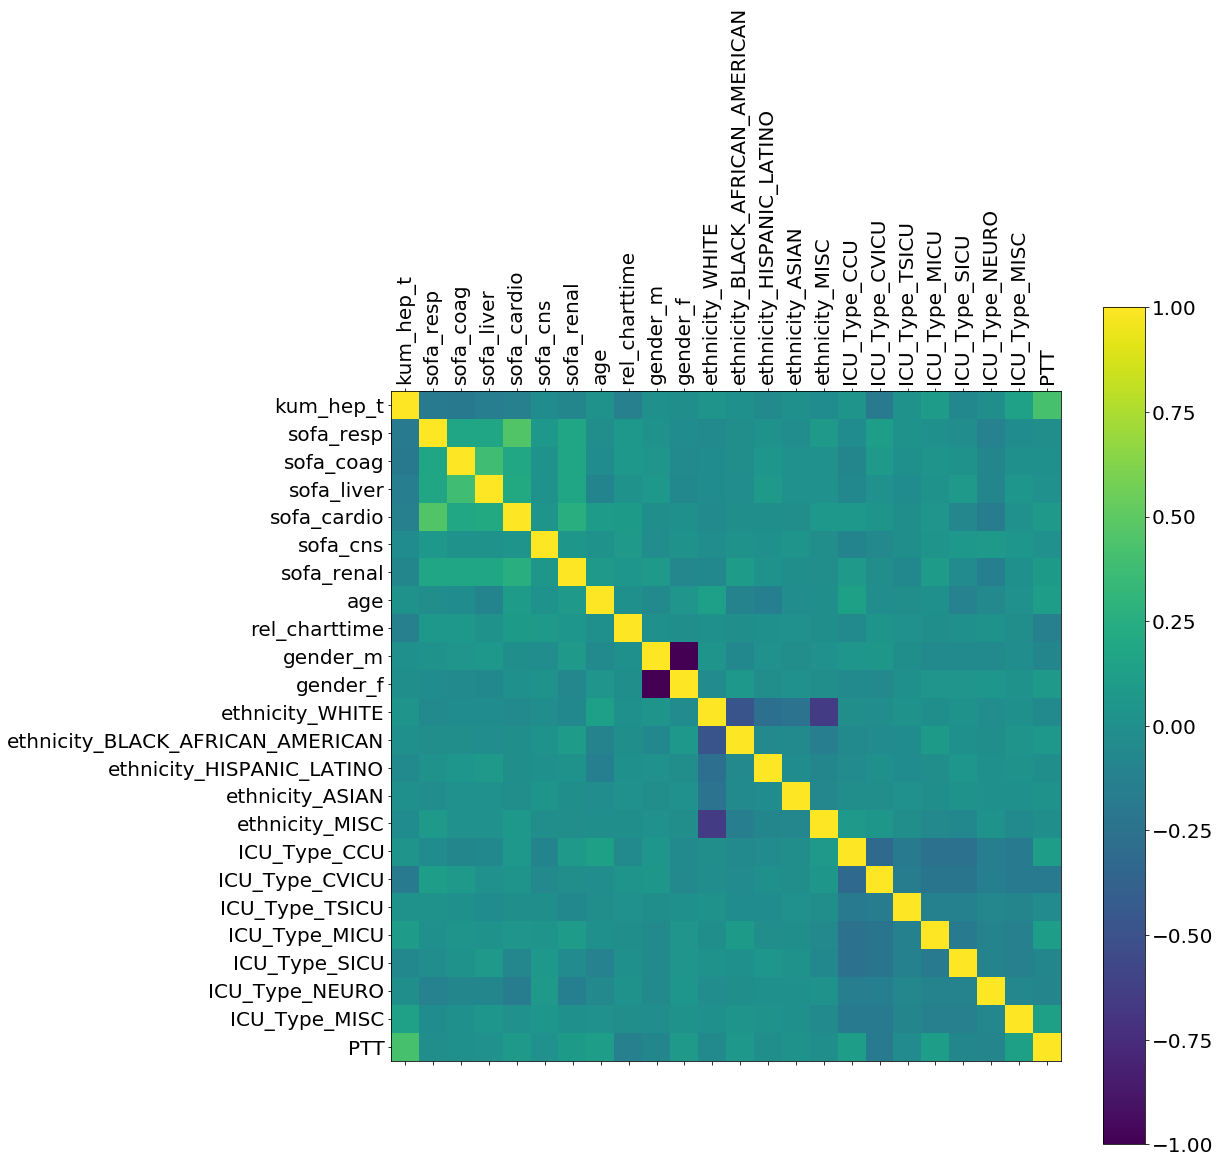

In [3]:
# Load Data
query = """
        SELECT *
        FROM `bachelorarbeit-heparin.mimic_data.cohort1_final`
        """
df = gbq.read_gbq(query, project_id = "bachelorarbeit-heparin")

# New columns as features:
ethnicity_WHITE = []
ethnicity_BLACK_AFRICAN_AMERICAN = []
ethnicity_HISPANIC_LATINO = []
ethnicity_ASIAN = []
ethnicity_MISC = []
ICU_Type_CCU = []
ICU_Type_CVICU = []
ICU_Type_TSICU = []
ICU_Type_MICU = []
ICU_Type_SICU = []
ICU_Type_NEURO = []
ICU_Type_MISC = []
gender_m = []
gender_f = []

# Convert gender to binary variables:
for i in range(len(df['gender'])):
    
    if df['gender'][i] == 'M':
        gender_m.append(1)
    else:
        gender_m.append(0)
    
    if df['gender'][i] == 'F':
        gender_f.append(1)
    else:
        gender_f.append(0)
        
# Convert ethnicities to binary variables:
for i in range(len(df['ethnicity'])):
    
    if df['ethnicity'][i] == 'WHITE':
        ethnicity_WHITE.append(1)
    else:
        ethnicity_WHITE.append(0)
        
    if df['ethnicity'][i] == 'BLACK/AFRICAN AMERICAN':
        ethnicity_BLACK_AFRICAN_AMERICAN.append(1)
    else:
        ethnicity_BLACK_AFRICAN_AMERICAN.append(0)
        
    if df['ethnicity'][i] == 'HISPANIC/LATINO':
        ethnicity_HISPANIC_LATINO.append(1)
    else:
        ethnicity_HISPANIC_LATINO.append(0)
    
    if df['ethnicity'][i] == 'ASIAN':
        ethnicity_ASIAN.append(1)
    else:
        ethnicity_ASIAN.append(0)
    
    if df['ethnicity'][i] != 'WHITE' and df['ethnicity'][i] != 'BLACK/AFRICAN AMERICAN' and df['ethnicity'][i] != 'HISPANIC/LATINO' and df['ethnicity'][i] != 'ASIAN':
        ethnicity_MISC.append(1)
    else:
        ethnicity_MISC.append(0)
        
# Convert ICU_Types to binary variables:
for i in range(len(df['ICU_Type'])):
    
    if df['ICU_Type'][i] == 'Coronary Care Unit (CCU)':
        ICU_Type_CCU.append(1)
    else:
        ICU_Type_CCU.append(0)
        
    if df['ICU_Type'][i] == 'Cardiac Vascular Intensive Care Unit (CVICU)':
        ICU_Type_CVICU.append(1)
    else:
        ICU_Type_CVICU.append(0)
        
    if df['ICU_Type'][i] == 'Medical Intensive Care Unit (MICU)':
        ICU_Type_MICU.append(1)
    else:
        ICU_Type_MICU.append(0)
        
    if df['ICU_Type'][i] == 'Trauma SICU (TSICU)':
        ICU_Type_TSICU.append(1)
    else:
        ICU_Type_TSICU.append(0)
    
    if df['ICU_Type'][i] == 'Surgical Intensive Care Unit (SICU)':
        ICU_Type_SICU.append(1)
    else:
        ICU_Type_SICU.append(0)
        
    if df['ICU_Type'][i] == 'Neuro Intermediate' or df['ICU_Type'][i] == 'Neuro Surgical Intensive Care Unit (Neuro SICU)' or df['ICU_Type'][i] == 'Neuro Stepdown':
        ICU_Type_NEURO.append(1)
    else:
        ICU_Type_NEURO.append(0)
        
    if df['ICU_Type'][i] != 'Neuro Intermediate' and df['ICU_Type'][i] != 'Neuro Surgical Intensive Care Unit (Neuro SICU)' and df['ICU_Type'][i] != 'Neuro Stepdown' and df['ICU_Type'][i] != 'Coronary Care Unit (CCU)' and df['ICU_Type'][i] != 'Cardiac Vascular Intensive Care Unit (CVICU)' and df['ICU_Type'][i] != 'Medical Intensive Care Unit (MICU)' and df['ICU_Type'][i] != 'Trauma SICU (TSICU)' and df['ICU_Type'][i] != 'Surgical Intensive Care Unit (SICU)':
        ICU_Type_MISC.append(1)
    else:
        ICU_Type_MISC.append(0)

# Add new Features to the data:
df['ethnicity_WHITE'] = ethnicity_WHITE
df['ethnicity_BLACK_AFRICAN_AMERICAN'] = ethnicity_BLACK_AFRICAN_AMERICAN
df['ethnicity_HISPANIC_LATINO'] = ethnicity_HISPANIC_LATINO
df['ethnicity_ASIAN'] = ethnicity_ASIAN
df['ethnicity_MISC'] = ethnicity_MISC
df['ICU_Type_CCU'] = ICU_Type_CCU
df['ICU_Type_CVICU'] = ICU_Type_CVICU
df['ICU_Type_TSICU'] = ICU_Type_TSICU
df['ICU_Type_MICU'] = ICU_Type_MICU
df['ICU_Type_SICU'] = ICU_Type_SICU
df['ICU_Type_NEURO'] = ICU_Type_NEURO
df['ICU_Type_MISC'] = ICU_Type_MISC
df['gender_m'] = gender_m
df['gender_f'] = gender_f
        
# Define x & y:
x = pd.DataFrame({'kum_hep_t':                        df['kum_hep_t'],
                  'sofa_resp':                        df['sofa_resp'],
                  'sofa_coag':                        df['sofa_coag'],
                  'sofa_liver':                       df['sofa_liver'],
                  'sofa_cardio':                      df['sofa_cardio'],
                  'sofa_cns':                         df['sofa_cns'],
                  'sofa_renal':                       df['sofa_renal'],
                  'age':                              df['age'],
                  'rel_charttime':                    df['rel_charttime'],
                  'gender_m':                         df['gender_m'],
                  'gender_f':                         df['gender_f'],
                  'ethnicity_WHITE':                  df['ethnicity_WHITE'],
                  'ethnicity_BLACK_AFRICAN_AMERICAN': df['ethnicity_BLACK_AFRICAN_AMERICAN'],
                  'ethnicity_HISPANIC_LATINO':        df['ethnicity_HISPANIC_LATINO'],
                  'ethnicity_ASIAN':                  df['ethnicity_ASIAN'],
                  'ethnicity_MISC':                   df['ethnicity_MISC'],
                  'ICU_Type_CCU':                     df['ICU_Type_CCU'],
                  'ICU_Type_CVICU':                   df['ICU_Type_CVICU'],
                  'ICU_Type_TSICU':                   df['ICU_Type_TSICU'],
                  'ICU_Type_MICU':                    df['ICU_Type_MICU'],
                  'ICU_Type_SICU':                    df['ICU_Type_SICU'],
                  'ICU_Type_NEURO':                   df['ICU_Type_NEURO'],
                  'ICU_Type_MISC':                    df['ICU_Type_MISC'],
                  'PTT':                              df['PTT']})                 
y = pd.DataFrame({'PTT':            df['PTT']})


f = plt.figure(figsize=(15,15))
plt.matshow(x.corr(), fignum=f.number)
plt.xticks(range(x.select_dtypes(['number']).shape[1]), x.select_dtypes(['number']).columns, fontsize=20, rotation=90)
plt.yticks(range(x.select_dtypes(['number']).shape[1]), x.select_dtypes(['number']).columns, fontsize=20)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=20)

matrix=x.corr(method='pearson')
print(matrix['PTT'])
print(matrix['kum_hep_t'])

### ALL FEATURES: REGRESSION COEFFICIENTS

In [22]:
# Load Data
query = """
        SELECT *
        FROM `bachelorarbeit-heparin.mimic_data.cohort1_final`
        """
df = gbq.read_gbq(query, project_id = "bachelorarbeit-heparin")

# New columns as features:
ethnicity_WHITE = []
ethnicity_BLACK_AFRICAN_AMERICAN = []
ethnicity_HISPANIC_LATINO = []
ethnicity_ASIAN = []
ethnicity_MISC = []
ICU_Type_CCU = []
ICU_Type_CVICU = []
ICU_Type_TSICU = []
ICU_Type_MICU = []
ICU_Type_SICU = []
ICU_Type_NEURO = []
ICU_Type_MISC = []

# Convert gender to binary variables:
for i in range(len(df['gender'])):
    
    if df['gender'][i] == 'M':
        df['gender'][i] = 0
    elif df['gender'][i] == 'F':
        df['gender'][i] = 1
        
# Convert ethnicities to binary variables:
for i in range(len(df['ethnicity'])):
    
    if df['ethnicity'][i] == 'WHITE':
        ethnicity_WHITE.append(1)
    else:
        ethnicity_WHITE.append(0)
        
    if df['ethnicity'][i] == 'BLACK/AFRICAN AMERICAN':
        ethnicity_BLACK_AFRICAN_AMERICAN.append(1)
    else:
        ethnicity_BLACK_AFRICAN_AMERICAN.append(0)
        
    if df['ethnicity'][i] == 'HISPANIC/LATINO':
        ethnicity_HISPANIC_LATINO.append(1)
    else:
        ethnicity_HISPANIC_LATINO.append(0)
    
    if df['ethnicity'][i] == 'ASIAN':
        ethnicity_ASIAN.append(1)
    else:
        ethnicity_ASIAN.append(0)
    
    if df['ethnicity'][i] != 'WHITE' and df['ethnicity'][i] != 'BLACK/AFRICAN AMERICAN' and df['ethnicity'][i] != 'HISPANIC/LATINO' and df['ethnicity'][i] != 'ASIAN':
        ethnicity_MISC.append(1)
    else:
        ethnicity_MISC.append(0)
        
# Convert ICU_Types to binary variables:
for i in range(len(df['ICU_Type'])):
    
    if df['ICU_Type'][i] == 'Coronary Care Unit (CCU)':
        ICU_Type_CCU.append(1)
    else:
        ICU_Type_CCU.append(0)
        
    if df['ICU_Type'][i] == 'Cardiac Vascular Intensive Care Unit (CVICU)':
        ICU_Type_CVICU.append(1)
    else:
        ICU_Type_CVICU.append(0)
        
    if df['ICU_Type'][i] == 'Medical Intensive Care Unit (MICU)':
        ICU_Type_MICU.append(1)
    else:
        ICU_Type_MICU.append(0)
        
    if df['ICU_Type'][i] == 'Trauma SICU (TSICU)':
        ICU_Type_TSICU.append(1)
    else:
        ICU_Type_TSICU.append(0)
    
    if df['ICU_Type'][i] == 'Surgical Intensive Care Unit (SICU)':
        ICU_Type_SICU.append(1)
    else:
        ICU_Type_SICU.append(0)
        
    if df['ICU_Type'][i] == 'Neuro Intermediate' or df['ICU_Type'][i] == 'Neuro Surgical Intensive Care Unit (Neuro SICU)' or df['ICU_Type'][i] == 'Neuro Stepdown':
        ICU_Type_NEURO.append(1)
    else:
        ICU_Type_NEURO.append(0)
        
    if df['ICU_Type'][i] != 'Neuro Intermediate' and df['ICU_Type'][i] != 'Neuro Surgical Intensive Care Unit (Neuro SICU)' and df['ICU_Type'][i] != 'Neuro Stepdown' and df['ICU_Type'][i] != 'Coronary Care Unit (CCU)' and df['ICU_Type'][i] != 'Cardiac Vascular Intensive Care Unit (CVICU)' and df['ICU_Type'][i] != 'Medical Intensive Care Unit (MICU)' and df['ICU_Type'][i] != 'Trauma SICU (TSICU)' and df['ICU_Type'][i] != 'Surgical Intensive Care Unit (SICU)':
        ICU_Type_MISC.append(1)
    else:
        ICU_Type_MISC.append(0)

# Add new Features to the data:
df['ethnicity_WHITE'] = ethnicity_WHITE
df['ethnicity_BLACK_AFRICAN_AMERICAN'] = ethnicity_BLACK_AFRICAN_AMERICAN
df['ethnicity_HISPANIC_LATINO'] = ethnicity_HISPANIC_LATINO
df['ethnicity_ASIAN'] = ethnicity_ASIAN
df['ethnicity_MISC'] = ethnicity_MISC
df['ICU_Type_CCU'] = ICU_Type_CCU
df['ICU_Type_CVICU'] = ICU_Type_CVICU
df['ICU_Type_TSICU'] = ICU_Type_TSICU
df['ICU_Type_MICU'] = ICU_Type_MICU
df['ICU_Type_SICU'] = ICU_Type_SICU
df['ICU_Type_NEURO'] = ICU_Type_NEURO
df['ICU_Type_MISC'] = ICU_Type_MISC
        
# Define x & y:
x = pd.DataFrame({'kum_hep_t':                        df['kum_hep_t'],
                  'sofa_resp':                        df['sofa_resp'],
                  'sofa_coag':                        df['sofa_coag'],
                  'sofa_liver':                       df['sofa_liver'],
                  'sofa_cardio':                      df['sofa_cardio'],
                  'sofa_cns':                         df['sofa_cns'],
                  'sofa_renal':                       df['sofa_renal'],
                  'age':                              df['age'],
                  'rel_charttime':                    df['rel_charttime'],
                  'gender':                           df['gender'],
                  'ethnicity_WHITE':                  df['ethnicity_WHITE'],
                  'ethnicity_BLACK_AFRICAN_AMERICAN': df['ethnicity_BLACK_AFRICAN_AMERICAN'],
                  'ethnicity_HISPANIC_LATINO':        df['ethnicity_HISPANIC_LATINO'],
                  'ethnicity_ASIAN':                  df['ethnicity_ASIAN'],
                  'ethnicity_MISC':                   df['ethnicity_MISC'],
                  'ICU_Type_CCU':                     df['ICU_Type_CCU'],
                  'ICU_Type_CVICU':                   df['ICU_Type_CVICU'],
                  'ICU_Type_TSICU':                   df['ICU_Type_TSICU'],
                  'ICU_Type_MICU':                    df['ICU_Type_MICU'],
                  'ICU_Type_SICU':                    df['ICU_Type_SICU'],
                  'ICU_Type_NEURO':                   df['ICU_Type_NEURO'],
                  'ICU_Type_MISC':                    df['ICU_Type_MISC']})                 
y = pd.DataFrame({'PTT':                              df['PTT']})

# Linear Regression
r2_scores_lin_reg = []
coefficients = []
stdev = []

for i in range(100):
    
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=i)
    lin_reg = LinearRegression().fit(x_train, y_train)
    r2_scores_lin_reg.append(r2_score(y_test, lin_reg.predict(x_test)))
    coefficients.append(lin_reg.coef_)
    stdev.append(x_train.std(axis=0))

# Coefficients
coef_by_stdev = []

# Iterate over every coefficient (22):
for i in range(len(coefficients[0][0])):
    temp = []
    # Iterate over every row in coefficient (100):
    for j in range(len(coefficients)):
        temp.append(coefficients[j][0][i]/stdev[j][i])
    coef_by_stdev.append(round(mean(temp),2))

# print Coefficient-Results:
print("Coefficients:\n")
for i in range(len(coef_by_stdev)):
    
    if i == 0:
        print(coef_by_stdev[i],"\tkum_hep_t")
    elif i == 1:
        print(coef_by_stdev[i],"\tsofa_resp")
    elif i == 2:
        print(coef_by_stdev[i],"\tsofa_coag")
    elif i == 3:
        print(coef_by_stdev[i],"\tsofa_liver")
    elif i == 4:
        print(coef_by_stdev[i],"\tsofa_cardio")
    elif i == 5:
        print(coef_by_stdev[i],"\tsofa_cns")
    elif i == 6:
        print(coef_by_stdev[i],"\tsofa_renal")
    elif i == 7:
        print(coef_by_stdev[i],"\tage")
    elif i == 8:
        print(coef_by_stdev[i],"\trel_charttime")
    elif i == 9:
        print(coef_by_stdev[i],"\tgender")
    elif i == 10:
        print(coef_by_stdev[i],"\tethnicity_WHITE")
    elif i == 11:
        print(coef_by_stdev[i],"\tethnicity_BLACK_AFRICAN_AMERICAN")
    elif i == 12:
        print(coef_by_stdev[i],"\tethnicity_HISPANIC_LATINO")
    elif i == 13:
        print(coef_by_stdev[i],"\tethnicity_ASIAN")
    elif i == 14:
        print(coef_by_stdev[i],"\tethnicity_MISC")
    elif i == 15:
        print(coef_by_stdev[i],"\tICU_Type_CCU")
    elif i == 16:
        print(coef_by_stdev[i],"\tICU_Type_CVICU")
    elif i == 17:
        print(coef_by_stdev[i],"\tICU_Type_TSICU")
    elif i == 18:
        print(coef_by_stdev[i],"\tICU_Type_MICU")
    elif i == 19:
        print(coef_by_stdev[i],"\tICU_Type_SICU")
    elif i == 20:
        print(coef_by_stdev[i],"\tICU_Type_NEURO")
    elif i == 21:
        print(coef_by_stdev[i],"\tICU_Type_MISC")

Downloading: 100%|███████████████████████████████████████████████████████████| 15376/15376 [00:04<00:00, 3299.46rows/s]


Coefficients:

0.71 	kum_hep_t
0.1 	sofa_resp
3.72 	sofa_coag
2.8 	sofa_liver
1.69 	sofa_cardio
0.72 	sofa_cns
1.5 	sofa_renal
0.02 	age
-0.0 	rel_charttime
12.72 	gender
-10.42 	ethnicity_WHITE
9.24 	ethnicity_BLACK_AFRICAN_AMERICAN
13.63 	ethnicity_HISPANIC_LATINO
19.06 	ethnicity_ASIAN
-9.05 	ethnicity_MISC
14.56 	ICU_Type_CCU
-13.71 	ICU_Type_CVICU
-12.17 	ICU_Type_TSICU
16.19 	ICU_Type_MICU
-9.56 	ICU_Type_SICU
-34.76 	ICU_Type_NEURO
29.4 	ICU_Type_MISC


### Some Interesting Plots 

### AGE


Downloading: 100%|███████████████████████████████████████████████████████████| 15376/15376 [00:04<00:00, 3192.69rows/s]


AVG R2-Score:  0.0147
EXAMPLE R2-Score:  0.0131


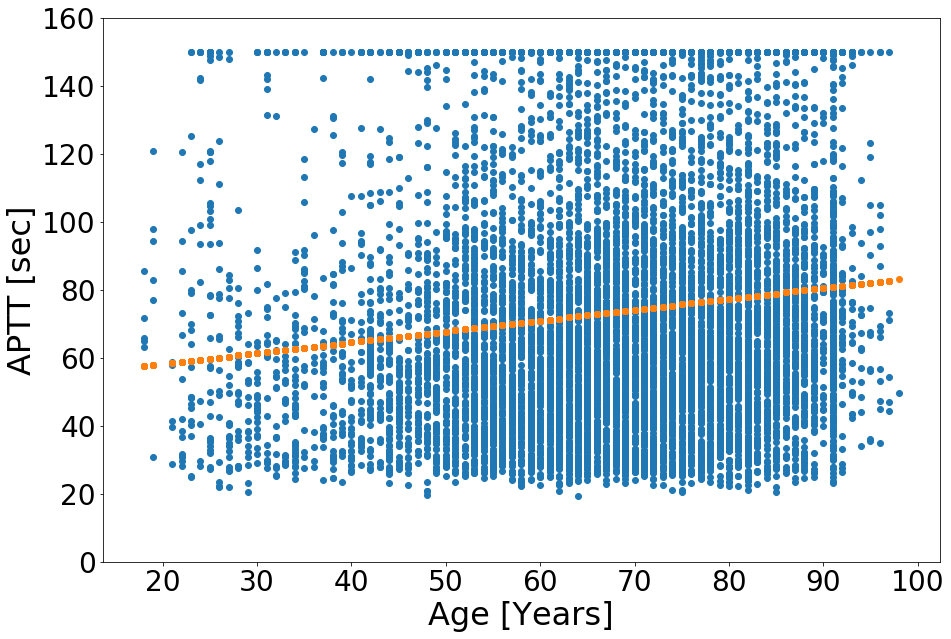

In [73]:
# Load Data
query = """
        SELECT *
        FROM `bachelorarbeit-heparin.mimic_data.cohort1_final`
        """
df = gbq.read_gbq(query, project_id = "bachelorarbeit-heparin")

# Define x & y:
x = pd.DataFrame({'age': df['age']})              
y = pd.DataFrame({'PTT': df['PTT']})

# Determine Average Performance (n=100)
r2_scores = []

for i in range(100):
    
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=i)
    lin_reg = LinearRegression()
    lin_reg.fit(x_train, y_train)
    r2_scores.append(r2_score(y_test, lin_reg.predict(x_test)))

# Evaluate the Model
print("AVG R2-Score: ", round(mean(r2_scores),4))


# EXAMPLE

                  
# Split Data into Train-/Test-Set:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

# Train the Linear Regression Model:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

# Plot the Results:
plt.figure(figsize=(15,10))
plt.xlabel('Age [Years]', fontsize=32)
plt.ylabel('APTT [sec]', fontsize=32)
plt.ylim(0,160)
plt.xticks(fontsize=28)
plt.yticks(fontsize=28)
plt.scatter(x_train, y_train)
plt.scatter(x_train, lin_reg.predict(x_train))

# Evaluate the model:
print("EXAMPLE R2-Score: ", round(r2_score(y_test, lin_reg.predict(x_test)), 4))

### SOFA-SCORE (GENERIC)


Downloading: 100%|███████████████████████████████████████████████████████████| 15376/15376 [00:05<00:00, 2620.44rows/s]


AVG R2-Score:  0.0031
EXAMPLE R2-Score:  0.0021


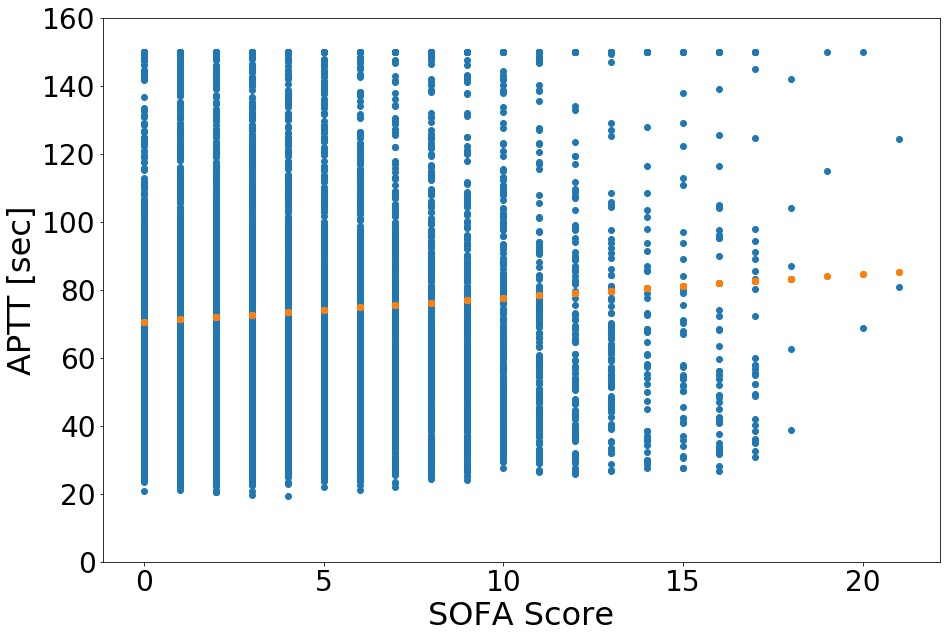

In [74]:
# Load Data
query = """
        SELECT *
        FROM `bachelorarbeit-heparin.mimic_data.cohort1_final`
        """
df = gbq.read_gbq(query, project_id = "bachelorarbeit-heparin")

# Define x & y:
x = pd.DataFrame({'sofa_score': df['sofa_score']})              
y = pd.DataFrame({'PTT': df['PTT']})
                  
# Determine Average Performance (n=100)
r2_scores = []

for i in range(100):
    
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=i)
    lin_reg = LinearRegression()
    lin_reg.fit(x_train, y_train)
    r2_scores.append(r2_score(y_test, lin_reg.predict(x_test)))

# Evaluate the Model
print("AVG R2-Score: ", round(mean(r2_scores),4))


# EXAMPLE

                  
# Split Data into Train-/Test-Set:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

# Train the Linear Regression Model:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

# Plot the Results:
plt.figure(figsize=(15,10))
plt.xlabel('SOFA Score', fontsize=32)
plt.ylabel('APTT [sec]', fontsize=32)
plt.ylim(0,160)
plt.xticks(fontsize=28)
plt.yticks(fontsize=28)
plt.scatter(x_train, y_train)
plt.scatter(x_train, lin_reg.predict(x_train))

# Evaluate the model:
print("EXAMPLE R2-Score: ", round(r2_score(y_test, lin_reg.predict(x_test)), 4))

### RELATIVE CHARTTIME


Downloading: 100%|███████████████████████████████████████████████████████████| 15376/15376 [00:04<00:00, 3145.72rows/s]


AVG R2-Score:  0.0166
EXAMPLE R2-Score:  0.0129


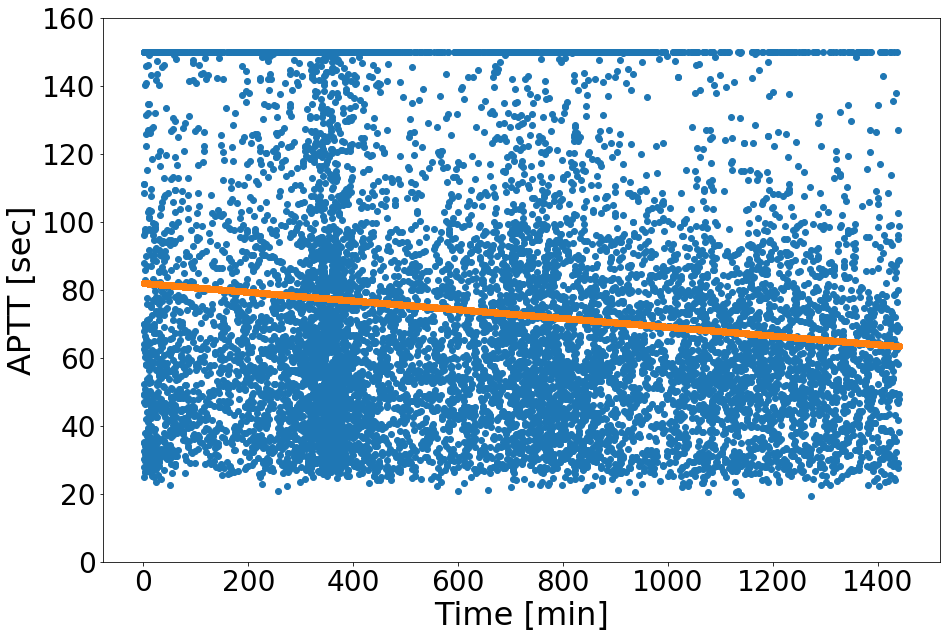

In [75]:
# Load Data
query = """
        SELECT *
        FROM `bachelorarbeit-heparin.mimic_data.cohort1_final`
        """
df = gbq.read_gbq(query, project_id = "bachelorarbeit-heparin")

# Define x & y:
x = pd.DataFrame({'rel_charttime': df['rel_charttime']})              
y = pd.DataFrame({'PTT': df['PTT']})
                  
# Determine Average Performance (n=100)
r2_scores = []

for i in range(100):
    
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=i)
    lin_reg = LinearRegression()
    lin_reg.fit(x_train, y_train)
    r2_scores.append(r2_score(y_test, lin_reg.predict(x_test)))

# Evaluate the Model
print("AVG R2-Score: ", round(mean(r2_scores),4))


# EXAMPLE

                  
# Split Data into Train-/Test-Set:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

# Train the Linear Regression Model:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

# Plot the Results:
plt.figure(figsize=(15,10))
plt.xlabel('Time [min]', fontsize=32)
plt.ylabel('APTT [sec]', fontsize=32)
plt.ylim(0,160)
plt.xticks(fontsize=28)
plt.yticks(fontsize=28)
plt.scatter(x_train, y_train)
plt.scatter(x_train, lin_reg.predict(x_train))

# Evaluate the model:
print("EXAMPLE R2-Score: ", round(r2_score(y_test, lin_reg.predict(x_test)), 4))